In [ ]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        # Retrieve the class name from the <object> tag
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                # Skip if no valid class label is found
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                # Ensure the class label exists in class_names
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the ResNet50 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to prevent updating its weights during training
base_model.trainable = False

# Create a new model with custom layers on top of ResNet50
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=10, validation_split=0.15, batch_size=32)

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

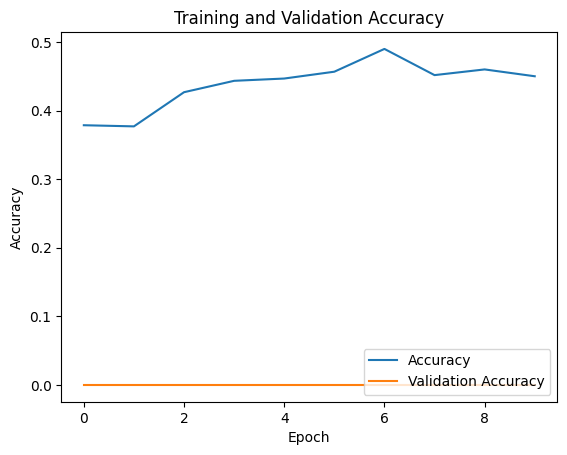

23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step


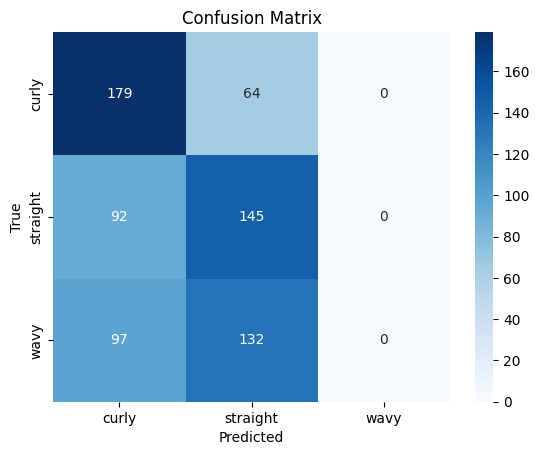

              precision    recall  f1-score   support

       curly       0.49      0.74      0.59       243
    straight       0.43      0.61      0.50       237
        wavy       0.00      0.00      0.00       229

    accuracy                           0.46       709
   macro avg       0.30      0.45      0.36       709
weighted avg       0.31      0.46      0.37       709



C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [1]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        # Retrieve the class name from the <object> tag
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                # Skip if no valid class label is found
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                # Ensure the class label exists in class_names
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the ResNet50 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to prevent updating its weights during training
base_model.trainable = False

# Create a new model with custom layers on top of ResNet50
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=10, validation_split=0.15, batch_size=32)

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

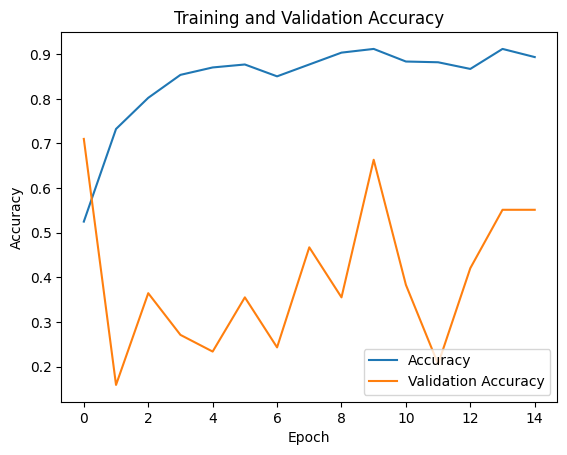

23/23 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step


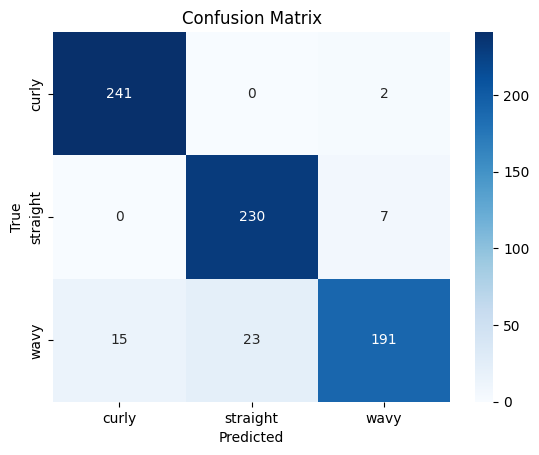

              precision    recall  f1-score   support

       curly       0.94      0.99      0.97       243
    straight       0.91      0.97      0.94       237
        wavy       0.95      0.83      0.89       229

    accuracy                           0.93       709
   macro avg       0.94      0.93      0.93       709
weighted avg       0.93      0.93      0.93       709



In [2]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the VGG19 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create a new model with custom layers on top of VGG19
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate if needed
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

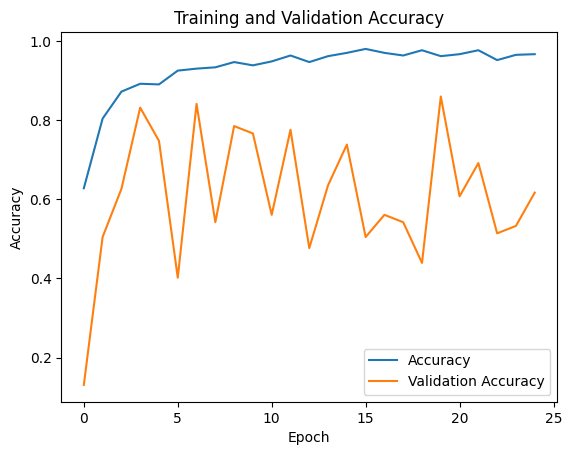

23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 550ms/step


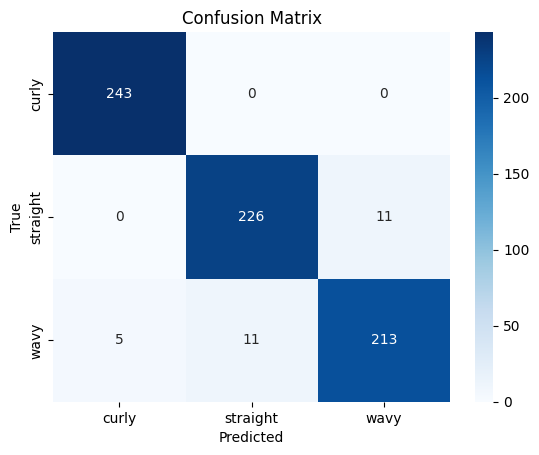

              precision    recall  f1-score   support

       curly       0.98      1.00      0.99       243
    straight       0.95      0.95      0.95       237
        wavy       0.95      0.93      0.94       229

    accuracy                           0.96       709
   macro avg       0.96      0.96      0.96       709
weighted avg       0.96      0.96      0.96       709



In [3]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the MobileNet model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create a new model with custom layers on top of MobileNet
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate if needed
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

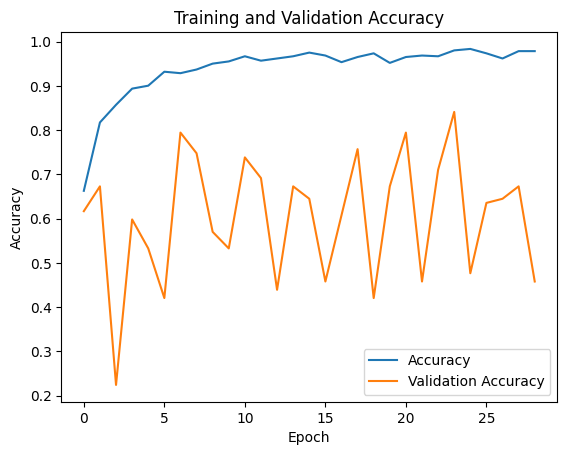

23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 600ms/step


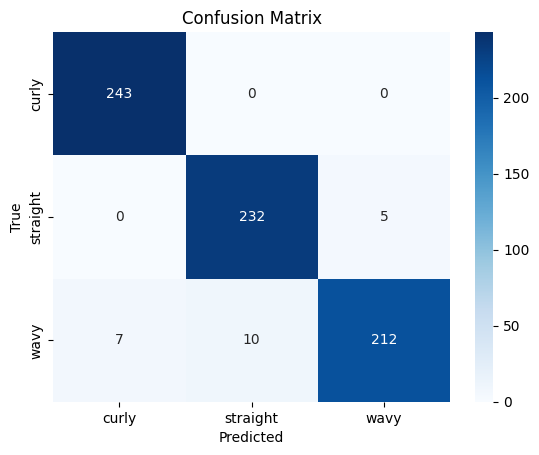

              precision    recall  f1-score   support

       curly       0.97      1.00      0.99       243
    straight       0.96      0.98      0.97       237
        wavy       0.98      0.93      0.95       229

    accuracy                           0.97       709
   macro avg       0.97      0.97      0.97       709
weighted avg       0.97      0.97      0.97       709



In [1]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the MobileNet model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create a new model with custom layers on top of MobileNet
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate if needed
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


In [3]:
# Function to load and preprocess a single image
def preprocess_single_image(image_path, img_size=(224, 224)):
    try:
        # Load and resize the image
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
        # Convert the image to an array
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        # Normalize the image
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        return img_array
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Predict on a single image
def predict_single_image(image_path, model, class_names):
    processed_image = preprocess_single_image(image_path)
    if processed_image is not None:
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        predicted_class_name = class_names[predicted_class]
        print(f"Predicted Class: {predicted_class_name}")
    else:
        print("Failed to process image.")

# Path to the single image
single_image_path = "C:/Users/kaush/Downloads/IMG_6874.JPG"  # Replace with your image path

# Predict on the image
predict_single_image(single_image_path, model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted Class: wavy


In [10]:
# Function to load and preprocess a single image
def preprocess_single_image(image_path, img_size=(224, 224)):
    try:
        # Load and resize the image
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
        # Convert the image to an array
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        # Normalize the image
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        return img_array
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Predict on a single image
def predict_single_image(image_path, model, class_names):
    processed_image = preprocess_single_image(image_path)
    if processed_image is not None:
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        predicted_class_name = class_names[predicted_class]
        print(f"Predicted Class: {predicted_class_name}")
    else:
        print("Failed to process image.")

# Path to the single image
single_image_path = "C:/Users/kaush/Downloads/th (2).jpg" # Replace with your image path

# Predict on the image
predict_single_image(single_image_path, model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Class: straight


In [9]:
# Function to load and preprocess a single image
def preprocess_single_image(image_path, img_size=(224, 224)):
    try:
        # Load and resize the image
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
        # Convert the image to an array
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        # Normalize the image
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        return img_array
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Predict on a single image
def predict_single_image(image_path, model, class_names):
    processed_image = preprocess_single_image(image_path)
    if processed_image is not None:
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        predicted_class_name = class_names[predicted_class]
        print(f"Predicted Class: {predicted_class_name}")
    else:
        print("Failed to process image.")

# Path to the single image
single_image_path = "C:/Users/kaush/Downloads/Curly-Hair-Tamil.jpg" # Replace with your image path

# Predict on the image
predict_single_image(single_image_path, model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted Class: curly


In [5]:
# Function to load and preprocess a single image
def preprocess_single_image(image_path, img_size=(224, 224)):
    try:
        # Load and resize the image
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
        # Convert the image to an array
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        # Normalize the image
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        return img_array
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Predict on a single image
def predict_single_image(image_path, model, class_names):
    processed_image = preprocess_single_image(image_path)
    if processed_image is not None:
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)
        predicted_class_name = class_names[predicted_class]
        print(f"Predicted Class: {predicted_class_name}")
    else:
        print("Failed to process image.")

# Path to the single image
single_image_path = "C:/Users/kaush/Downloads/indian skins scrapped/b.jpg"  # Replace with your image path

# Predict on the image
predict_single_image(single_image_path, model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Class: straight


No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

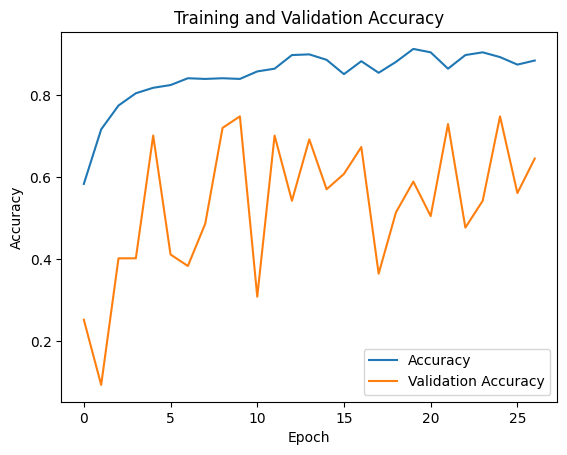

23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step


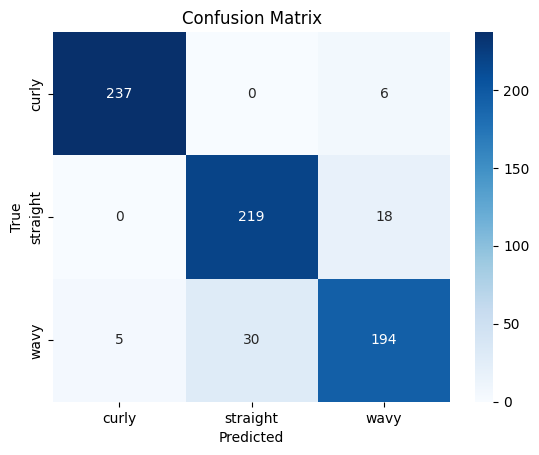

              precision    recall  f1-score   support

       curly       0.98      0.98      0.98       243
    straight       0.88      0.92      0.90       237
        wavy       0.89      0.85      0.87       229

    accuracy                           0.92       709
   macro avg       0.92      0.92      0.92       709
weighted avg       0.92      0.92      0.92       709



In [4]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(299, 299)):  # InceptionV3 requires 299x299 input size
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the InceptionV3 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze the base model

# Create a new model with custom layers on top of InceptionV3
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate if needed
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

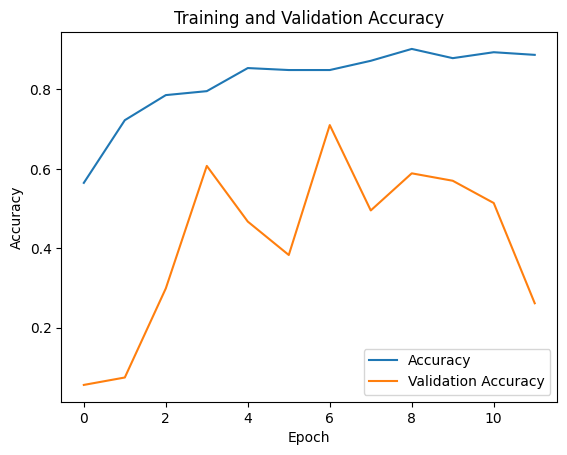

23/23 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step


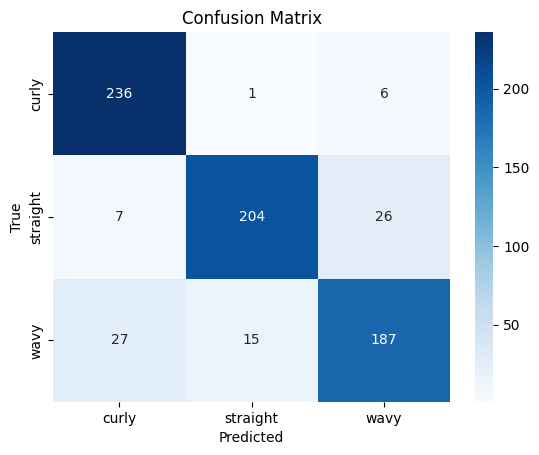

              precision    recall  f1-score   support

       curly       0.87      0.97      0.92       243
    straight       0.93      0.86      0.89       237
        wavy       0.85      0.82      0.83       229

    accuracy                           0.88       709
   macro avg       0.89      0.88      0.88       709
weighted avg       0.89      0.88      0.88       709



In [5]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):  # DenseNet121 requires 224x224 input size
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the DenseNet121 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create a new model with custom layers on top of DenseNet121
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate if needed
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

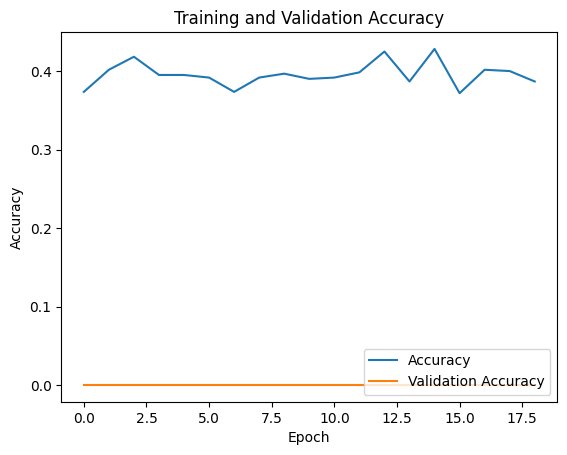

23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 977ms/step


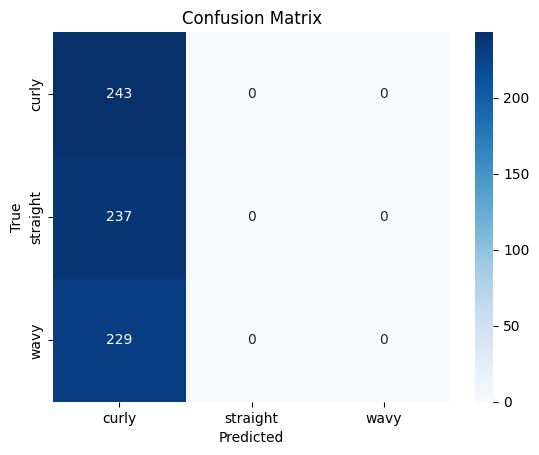

              precision    recall  f1-score   support

       curly       0.34      1.00      0.51       243
    straight       0.00      0.00      0.00       237
        wavy       0.00      0.00      0.00       229

    accuracy                           0.34       709
   macro avg       0.11      0.33      0.17       709
weighted avg       0.12      0.34      0.17       709



C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [6]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the EfficientNetB0 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create a new model with custom layers on top of EfficientNetB0
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate if needed
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the images to generate predictions
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(labels, predicted_labels, average='weighted')
recall = recall_score(labels, predicted_labels, average='weighted')
f1 = f1_score(labels, predicted_labels, average='weighted')

# Print Precision, Recall, and F1-Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")




23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 870ms/step
Precision: 0.1175
Recall: 0.3427
F1-Score: 0.1750


C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/hair/hair/annotation\curly\images209.xml
Skipping images209.jpg due to missin

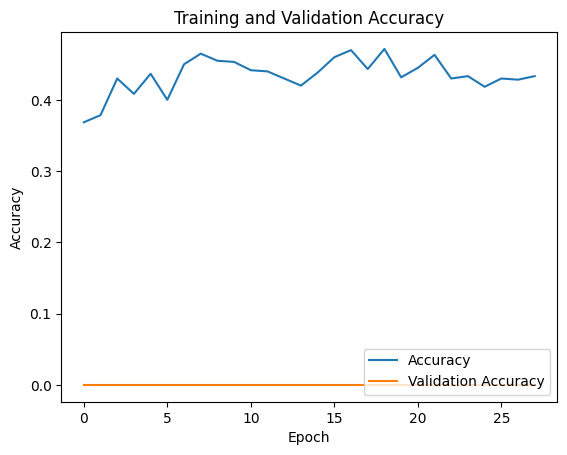

23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step


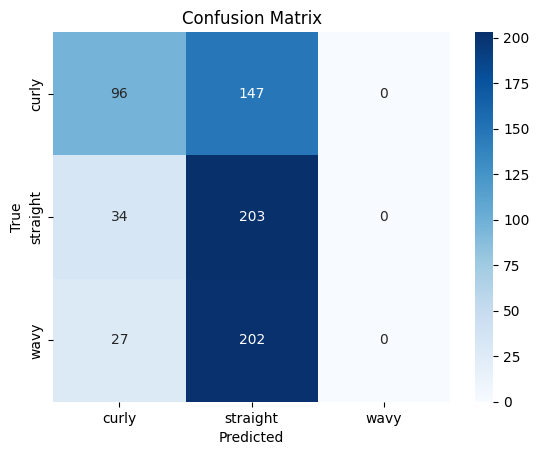

              precision    recall  f1-score   support

       curly       0.61      0.40      0.48       243
    straight       0.37      0.86      0.51       237
        wavy       0.00      0.00      0.00       229

    accuracy                           0.42       709
   macro avg       0.33      0.42      0.33       709
weighted avg       0.33      0.42      0.34       709



C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [1]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/hair/hair/training"
xml_dir = "C:/Users/kaush/Downloads/hair/hair/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the ResNet50 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create a new model with custom layers on top of ResNet50
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate if needed
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def inception_v3(input_shape=(224, 224, 3), num_classes=1000):
    inputs = tf.keras.Input(shape=input_shape)

    # Initial convolution layers
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='valid', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(32, (3, 3), padding='valid', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Inception Block 1
    x = inception_block(x, 64, 128, 32, 32)

    # Inception Block 2
    x = inception_block(x, 128, 256, 64, 64)

    # Inception Block 3
    x = inception_block(x, 256, 512, 128, 128)

    # Inception Block 4
    x = inception_block(x, 512, 1024, 256, 256)

    # Auxillary Classifier (added for regularization during training)
    aux = auxiliary_classifier(x, num_classes)

    # Global Average Pooling and final Dense Layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs=inputs, outputs=[x, aux])

    model.summary()

    return model

# Inception Block: A basic building block of InceptionV3
def inception_block(x, filters1x1, filters3x3, filters5x5, filters_pool):
    # Path 1: 1x1 Convolution
    path1 = layers.Conv2D(filters1x1, (1, 1), padding='same', use_bias=False)(x)
    path1 = layers.BatchNormalization()(path1)
    path1 = layers.ReLU()(path1)

    # Path 2: 1x1 Convolution -> 3x3 Convolution
    path2 = layers.Conv2D(filters3x3, (1, 1), padding='same', use_bias=False)(x)
    path2 = layers.BatchNormalization()(path2)
    path2 = layers.ReLU()(path2)
    path2 = layers.Conv2D(filters3x3, (3, 3), padding='same', use_bias=False)(path2)
    path2 = layers.BatchNormalization()(path2)
    path2 = layers.ReLU()(path2)

    # Path 3: 1x1 Convolution -> 5x5 Convolution
    path3 = layers.Conv2D(filters5x5, (1, 1), padding='same', use_bias=False)(x)
    path3 = layers.BatchNormalization()(path3)
    path3 = layers.ReLU()(path3)
    path3 = layers.Conv2D(filters5x5, (5, 5), padding='same', use_bias=False)(path3)
    path3 = layers.BatchNormalization()(path3)
    path3 = layers.ReLU()(path3)

    # Path 4: MaxPooling -> 1x1 Convolution
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters_pool, (1, 1), padding='same', use_bias=False)(path4)
    path4 = layers.BatchNormalization()(path4)
    path4 = layers.ReLU()(path4)

    # Concatenate all the paths
    x = layers.concatenate([path1, path2, path3, path4], axis=-1)

    return x

# Auxiliary Classifier (for regularization)
def auxiliary_classifier(x, num_classes):
    x = layers.AveragePooling2D((5, 5), strides=(3, 3))(x)
    x = layers.Conv2D(128, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dense(num_classes, activation='softmax')(x)
    return x

# Instantiate the model
inception_model = inception_v3(input_shape=(224, 224, 3), num_classes=1000)

# Print model summary
inception_model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 111, 111,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 109, 109,  │      9,216 │ re_lu_3[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        128 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_4 (ReLU)      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 109, 109,  │     18,432 │ re_lu_4[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_5 (ReLU)      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ re_lu_5[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 54, 54,    │      8,192 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 54, 54,    │      2,048 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        512 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        128 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_7 (ReLU)      │ (None, 54, 54,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_9 (ReLU)      │ (None, 54, 54,    │          0 │ batch_normalizat

 Total params: 58,750,128 (224.11 MB)

 Trainable params: 58,737,136 (224.06 MB)

 Non-trainable params: 12,992 (50.75 KB)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 111, 111,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 109, 109,  │      9,216 │ re_lu_3[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        128 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_4 (ReLU)      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 109, 109,  │     18,432 │ re_lu_4[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_5 (ReLU)      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ re_lu_5[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 54, 54,    │      8,192 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 54, 54,    │      2,048 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        512 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        128 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_7 (ReLU)      │ (None, 54, 54,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_9 (ReLU)      │ (None, 54, 54,    │          0 │ batch_normalizat

 Total params: 58,750,128 (224.11 MB)

 Trainable params: 58,737,136 (224.06 MB)

 Non-trainable params: 12,992 (50.75 KB)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Depthwise Separable Convolution Block
def depthwise_separable_block(x, pointwise_filters, depthwise_stride=1):
    # Depthwise convolution
    x = layers.DepthwiseConv2D((3, 3), strides=(depthwise_stride, depthwise_stride), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Pointwise convolution (1x1 convolution)
    x = layers.Conv2D(pointwise_filters, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    return x

# Define the MobileNet model
def mobilenet(input_shape=(224, 224, 3), num_classes=1000):
    # Input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Initial convolution layer (regular 3x3 convolution)
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='valid', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Depthwise Separable Convolutions (repeated for MobileNet layers)
    x = depthwise_separable_block(x, 64, depthwise_stride=1)
    x = depthwise_separable_block(x, 128, depthwise_stride=2)
    x = depthwise_separable_block(x, 256, depthwise_stride=2)
    x = depthwise_separable_block(x, 512, depthwise_stride=2)
    x = depthwise_separable_block(x, 1024, depthwise_stride=2)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layer (Dense)
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs=inputs, outputs=x)

    # Model summary
    model.summary()

    return model

# Instantiate the model
mobilenet_model = mobilenet(input_shape=(224, 224, 3), num_classes=1000)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 111, 111, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_31 (ReLU)                 │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 111, 111, 32)   │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_32 (ReLU)                 │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 111, 111, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 111, 111, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_33 (ReLU)                 │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 56, 56, 64)     │           576 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_34 (ReLU)                 │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_35 (ReLU)                 │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 28, 28, 128)    │         1,152 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_36 (ReLU)                 │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 28, 28, 256)    │        32,768 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,745,192 (6.66 MB)

 Trainable params: 1,739,176 (6.63 MB)

 Non-trainable params: 6,016 (23.50 KB)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Dense Block
def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        # 1x1 Convolution (Bottleneck layer)
        bottleneck = layers.Conv2D(4 * growth_rate, (1, 1), padding="same", use_bias=False)(x)
        bottleneck = layers.BatchNormalization()(bottleneck)
        bottleneck = layers.ReLU()(bottleneck)

        # 3x3 Convolution (Main layer)
        conv = layers.Conv2D(growth_rate, (3, 3), padding="same", use_bias=False)(bottleneck)
        conv = layers.BatchNormalization()(conv)
        conv = layers.ReLU()(conv)

        # Concatenate the input with the new layer output (DenseNet idea)
        x = layers.concatenate([x, conv], axis=-1)

    return x

# Define the Transition Layer
def transition_layer(x, reduction):
    # 1x1 Convolution to reduce the number of feature maps
    x = layers.Conv2D(int(x.shape[-1] * reduction), (1, 1), padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # 2x2 Average Pooling
    x = layers.AvgPool2D((2, 2), strides=2)(x)
    
    return x

# Define the DenseNet121 model
def densenet121(input_shape=(224, 224, 3), num_classes=1000):
    # Input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Initial Convolution Layer
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding="same", use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Max Pooling Layer
    x = layers.MaxPooling2D((3, 3), strides=2, padding="same")(x)

    # Dense Blocks with Transition Layers in between
    # Block 1
    x = dense_block(x, num_layers=6, growth_rate=32)
    x = transition_layer(x, reduction=0.5)
    
    # Block 2
    x = dense_block(x, num_layers=12, growth_rate=32)
    x = transition_layer(x, reduction=0.5)
    
    # Block 3
    x = dense_block(x, num_layers=24, growth_rate=32)
    x = transition_layer(x, reduction=0.5)

    # Block 4
    x = dense_block(x, num_layers=16, growth_rate=32)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected (Dense) layer
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs=inputs, outputs=x)

    # Print model summary
    model.summary()

    return model

# Instantiate the model
densenet_model = densenet121(input_shape=(224, 224, 3), num_classes=1000)


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 112, 112,  │      9,408 │ input_layer_7[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_37[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_42 (ReLU)     │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 56, 56,    │          0 │ re_lu_42[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 56, 56,    │      8,192 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_38[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_43 (ReLU)     │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 56, 56,    │     36,864 │ re_lu_43[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        128 │ conv2d_39[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_44 (ReLU)     │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 56, 56,    │          0 │ max_pooling2d_5[… │
│ (Concatenate)       │ 96)               │            │ re_lu_44[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 56, 56,    │     12,288 │ concatenate_4[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_45 (ReLU)     │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 56, 56,    │     36,864 │ re_lu_45[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        128 │ conv2d_41[0][0] 

 Total params: 7,936,168 (30.27 MB)

 Trainable params: 7,915,688 (30.20 MB)

 Non-trainable params: 20,480 (80.00 KB)